# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/traffic-signs-data/train.p'
testing_file = 'data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

We can visualize the distribution of sign names in both the training and test data.

First we create a mapping of labels to sign names, which we'll reuse later on in the assignment.

In [4]:
import csv

# Create mapping of sign indices
sign_mapping = {}
reader = csv.reader(open('./signnames.csv'), delimiter=',')
next(reader, None)  # Skip header

for idx, sign in reader:    
    key = int(idx)
    sign_mapping[key] = sign
        
print(sign_mapping)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

Then we can collect the frequency of each label for both train and test data, and visualize it in a histogram format.

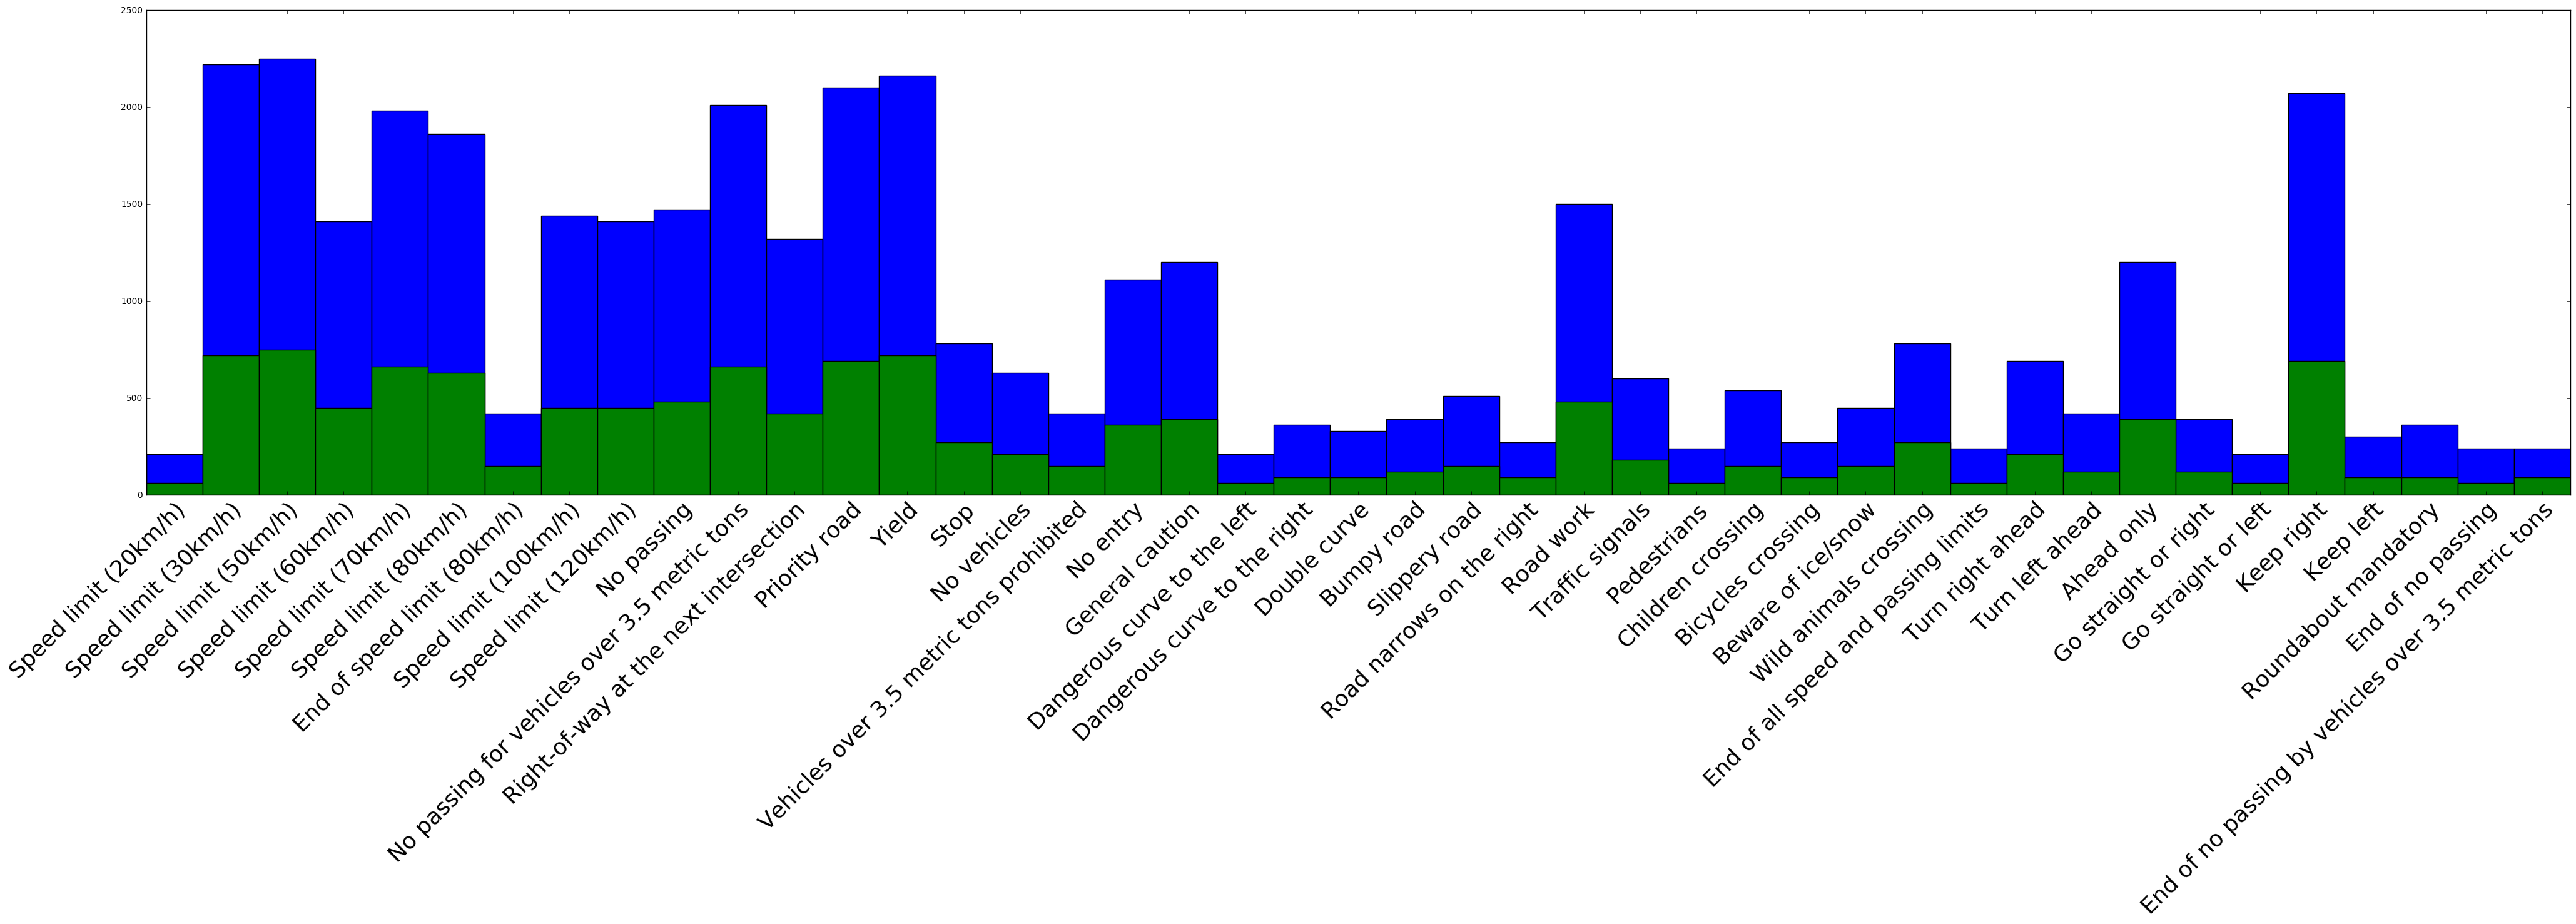

In [5]:
from collections import Counter

x_str = []
train_freq = []
test_freq = []

train_freqs = Counter(y_train)
test_freqs = Counter(y_test)

# Get frequency of signs by name
for idx, sign_name in sign_mapping.items():
    x_str.append(sign_name)
    train_freq.append(train_freqs[idx])
    test_freq.append(test_freqs[idx])

# Graph data
pos = np.arange(n_classes)    
width = 1

plt.figure(figsize=(50, 10))
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(
    x_str, rotation=45, rotation_mode='anchor', 
    ha='right', fontsize=26
)

plt.bar(pos, train_freq, width, color='b')
plt.bar(pos, test_freq, width, color='g')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

In [7]:
# Normalize data
is_normalized = False

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

if not is_normalized:
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    is_normalized = True

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I did two things to preprocess the data.

1. The first is to **shuffle the data**. This is done to help the neural net generalize.

2. The second is to **normalize the data**. This helps condition the data and makes it easier for the neural net to converge.

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [9]:
from sklearn.model_selection import train_test_split

# Split training
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the built-in `sklearn` function `train_test_split` to split 20% of the training data into validation data.

Did not generate additional data.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def ChoiNet(x, x_depth, y_classes, keep_prob=1.0):     
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. 
    # Output = (input_height - filter_height + 1) / vertical_stride
    # = (32 - 5 + 1) / 1
    # = 28x28x6.        
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, x_depth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. 
    # (28 - 1 + 1) / 2
    # Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, y_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(y_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    logits_drop = tf.nn.dropout(logits, keep_prob)
    
    model = {
        'weights': [conv1_W, conv2_W, fc1_W, fc2_W, fc3_W],
        'biases': [conv1_b, conv2_b, fc1_b, fc2_b, fc3_b],
        'logits': logits_drop
    }    
    return model

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model is essentially a LeNet model, with support for dropout.

There are two convolution layers, each followed with ReLu activation and pooling layers. The first layer takes in input shapes of 32x32x1, and the second takes in inputs of shape 10x10x16.

The output of the second convolution layer is then flattened into a 400 features and fed into two fully connected layers, each followed by ReLu activation. The first layer takes in input of shape 400x1, and the second takes in input of 84x1. 

The results of the last fully connected layer is then fed through a dropout layer, with `keep_prob` as a configurable variable. The final output of the neural net is a `dict` with `weights`, `biases`, and `logits` as keys, where `weights` and `biases` are weights and biases in ordered by its position from the input to output layer, and `logits` is the final output of the dropout layer.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Variables
x = tf.placeholder(tf.float32, (None, 32, 32, image_shape[2]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [12]:
# Hyperparams

EPOCHS = 100
BATCH_SIZE = 128

learn_rate = 0.001
reg_beta = 5e-04

In [13]:
# Build model
model = ChoiNet(x, x_depth=image_shape[2], y_classes=n_classes, keep_prob=keep_prob)
logits = model['logits']

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# Regularization
regs = tf.reduce_sum([tf.nn.l2_loss(w) for w in model['weights']])
loss_operation += (reg_beta * regs)

# Optimize
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
# Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
# Training

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.482

EPOCH 2 ...
Validation Accuracy = 0.761

EPOCH 3 ...
Validation Accuracy = 0.845

EPOCH 4 ...
Validation Accuracy = 0.888

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.930

EPOCH 7 ...
Validation Accuracy = 0.936

EPOCH 8 ...
Validation Accuracy = 0.945

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.959

EPOCH 11 ...
Validation Accuracy = 0.957

EPOCH 12 ...
Validation Accuracy = 0.957

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.970

EPOCH 15 ...
Validation Accuracy = 0.961

EPOCH 16 ...
Validation Accuracy = 0.971

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.976

EPOCH 19 ...
Validation Accuracy = 0.973

EPOCH 20 ...
Validation Accuracy = 0.980

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.980

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

In [16]:
# Test model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.927


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**Hyperparameters**

I trained the model with a batch size of 128, epoch of 100, and a learn rate of 0.001. 

I tried a couple variations, but those hyperparams seem to work the best. For example, increasing the learn rate even to 0.002 seem to dramatically decrease both validation and test accuracy. Epochs lower than 100 gave test accuracy closer to 93%, while increasing seem to give diminishing returns, plateauing at ~93-94% accuracy.

**Regularization**

I used a 50% dropout and a L2 regularization, with the standard reg beta of 5e-4. I also tried increasing and decreasing both of these parameters. Decreasing dropout and the reg beta led to worse test results, likely due to overfitting. Increasing dropout seemed to slow training rate, and required higher epochs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with a basic LeNet architecture to get a baseline (90% with 10 epochs), then iteratively added more improvements. 

The first thing I tried was to normalize the data, which improved the model to ~92%. I then started adding dropout and L2 regularization with the standard parameters (50%, 5e-4 respectively). The result at that point was ~93%. 

The final step was to tweak the hyperparameters. I started with learning rate, but quickly discovered that 0.001 was pretty optimal in this case. Decreasing led to much longer training times, and increasing led to much lower accuracy. With epochs I basically kept increasing until there seemed to be diminishing returns.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

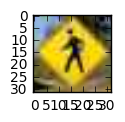

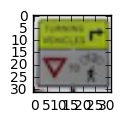

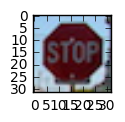

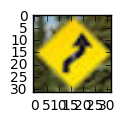

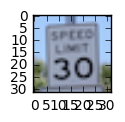

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import matplotlib.image as mpimg

image_paths = glob.glob('./street-photos/*.jpg')
images = []

for i, image_path in enumerate(image_paths):
    image = mpimg.imread(image_path)
    normalized = normalize(image)
    images.append(normalized)

    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The 4th image may be difficult to classify because there are two sections and both the bicycle and pedestrian figures.

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Prediction function
prediction = tf.argmax(logits, 1)

In [19]:
# Make predictions for each image

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    
    for i, image in enumerate(images):
        print("Prediction for '{}'...".format(image_paths[i]))
        pred = sess.run(prediction, feed_dict={x: [image], keep_prob: 1.0})
        key = pred[0]
        print(sign_mapping[key])

Prediction for './street-photos/IMG_1021.jpg'...
Speed limit (20km/h)
Prediction for './street-photos/IMG_1022.jpg'...
No entry
Prediction for './street-photos/IMG_1023.jpg'...
Stop
Prediction for './street-photos/IMG_1024.jpg'...
Dangerous curve to the right
Prediction for './street-photos/IMG_1025.jpg'...
Dangerous curve to the right


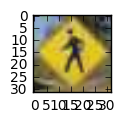

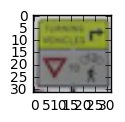

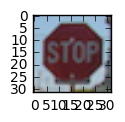

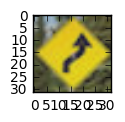

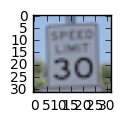

In [20]:
for image in images:
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [21]:
# Actually map to closest equivalent

new_X = images
new_y = [14, 27, 1, 13, 21]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    test_accuracy = evaluate(new_X, new_y)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.000


The model is unable to perform as well on the new pictures (20% vs ~95% on test set).

In [22]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

preds = tf.nn.softmax(logits)

softmaxes = None

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    softmaxes = sess.run(preds, feed_dict={x: new_X, y: new_y, keep_prob: 1.0})    

In [23]:
def graph_softmax(softmax):
    data = list(map(lambda x: max([x * 100, 0]), softmax))
    plt.bar(np.arange(n_classes), data)    
    
    plt.xlabel('Sign Index')
    plt.ylabel('Probability (%)')    
    plt.ylim([0, 100])
    
    plt.show()

./street-photos/IMG_1021.jpg


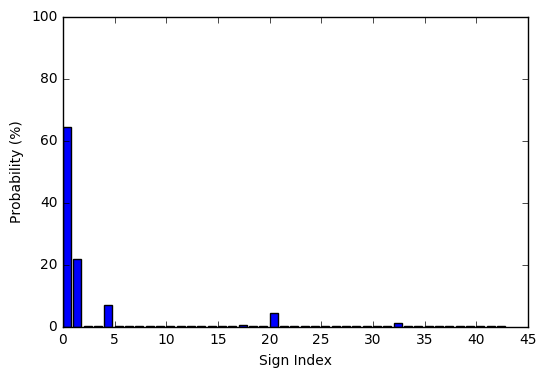

./street-photos/IMG_1022.jpg


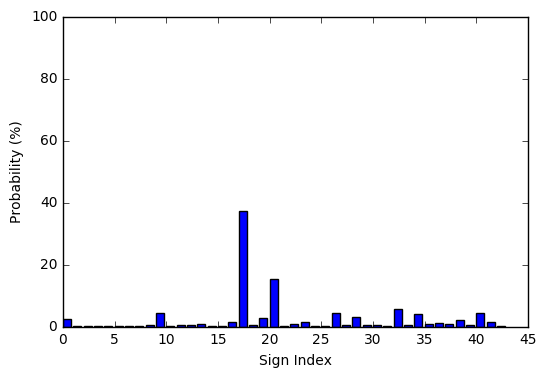

./street-photos/IMG_1023.jpg


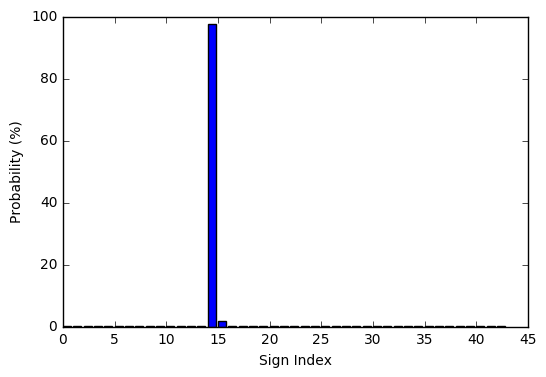

./street-photos/IMG_1024.jpg


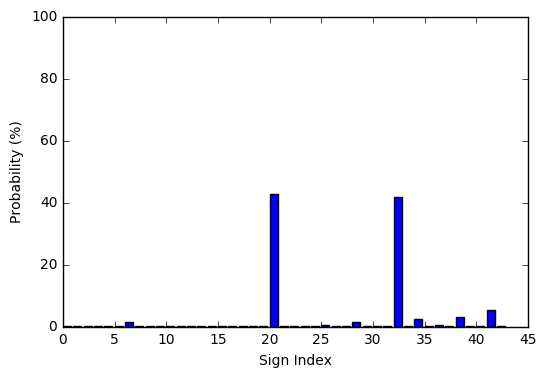

./street-photos/IMG_1025.jpg


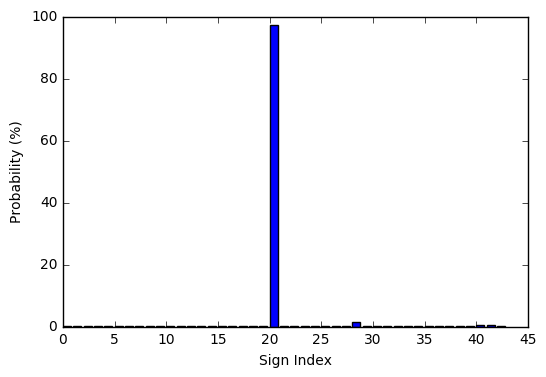

In [24]:
for i, image_path in enumerate(image_paths):
    print(image_path)    
    softmax = softmaxes[i]
    graph_softmax(softmax)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [25]:
from collections import Counter

def top_ks(xs, k=5):
    """Get top K for any given Xs"""
    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax, k=k)
    
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))    
        top_k = sess.run(top_k, feed_dict={x: new_X, keep_prob: 1.0})
        
        return top_k
    
def top_k_stats(top_k):
    """Get top ks and their probabilities, given a TopKV2 object"""
    indices = np.array(top_k.indices).flatten()
    vals = np.array(top_k.values).flatten()
    probs = {}
    confidence = {}
    
    # Collect all probabilities
    for i, idx in enumerate(indices):
        if probs.get(idx) is None:
            probs[idx] = []
                    
        probs[idx].append(vals[i])
        
    # Calculate mean confidence
    for idx in indices:
        confidence[idx] = np.mean(probs[idx])
    
    # Return sorted tuple of (class, confidence)
    sorted_classes = sorted(confidence.items(),
                            key=operator.itemgetter(1))
    
    return sorted_classes

In [26]:
import operator 

top_k = top_ks(new_X)
sorted_classes = top_k_stats(top_k)

top_classes = sorted_classes[-5:]
bot_classes = sorted_classes[0:4]

print('Top classes:')
print()

for class_id, prob in top_classes[::-1]:
    sign_name = sign_mapping[class_id]
    print('- {}: {}'.format(sign_name, prob))
    
print()    
print('Bottom classes:')
print()

for class_id, prob in bot_classes[::-1]:
    sign_name = sign_mapping[class_id]
    print('- {}: {}'.format(sign_name, prob))

Top classes:

- Stop: 0.9765448570251465
- Dangerous curve to the right: 0.39871054887771606
- No entry: 0.37157127261161804
- Speed limit (20km/h): 0.32153645157814026
- Speed limit (30km/h): 0.21807599067687988

Bottom classes:

- Children crossing: 0.015264649875462055
- Speed limit (60km/h): 0.002419383730739355
- Yield: 0.0010196731891483068
- Bicycles crossing: 0.0005295982700772583


The model is most certain about the stop sign, and the speed limit (30k/m), both of which have a 90%+ confidence. Interestingly, the model got the stop sign right, but incorrectly predicted speed limit on a pedestrian sign.

The only other sign the model showed reasonable confidence in (50%+) is the "Dangerous curve to the right" sign, which it also got wrong. It showed < 25% confidence in all the other signs. Given that its accuracy was only at 20% with these images, it seems these US traffic signs confused the classifier.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.